## Automating Crypto API Pull

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [25]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7a733e30-00eb-4ff2-a1b4-98a050f51529',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.float_format', lambda x: '%.5f' % x)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\duyan\Jupyter - Python\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\duyan\Jupyter - Python\CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\duyan\Jupyter - Python\CryptoAPI.csv', mode='a', header=False)

In [26]:
import os 
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API Pull Completed!')
    sleep(60)
exit()

C:\Users\duyan\AppData\Local\Temp\ipykernel_11720\2697765686.py:33: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Pull Completed!


C:\Users\duyan\AppData\Local\Temp\ipykernel_11720\2697765686.py:33: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Pull Completed!


KeyboardInterrupt: 

In [27]:
#To read in the file, stop the pulling and call:
df2 = pd.read_csv(r'C:\Users\duyan\Jupyter - Python\CryptoAPI.csv')
df2

Unnamed: 0    id          name symbol          slug  num_market_pairs  \
0            0     1       Bitcoin    BTC       bitcoin             10353   
1            1  1027      Ethereum    ETH      ethereum              7139   
2            2   825        Tether   USDT        tether             57437   
3            3    52           XRP    XRP           xrp               997   
4            4  1839           BNB    BNB           bnb              1522   
5            5  3408      USD Coin   USDC      usd-coin             13387   
6            6  2010       Cardano    ADA       cardano               878   
7            7  5426        Solana    SOL        solana               490   
8            8    74      Dogecoin   DOGE      dogecoin               748   
9            9  1958          TRON    TRX          tron               792   
10          10  3890       Polygon  MATIC       polygon               780   
11          11     2      Litecoin    LTC      litecoin               952   
12          12  6636      Polkadot    DOT  polkadot-new               535   
13          13  5805     Avalanche   AVAX     avalanche               468   
14          14  1831  Bitcoin Cash    BCH  bitcoin-cash               732   
15           0     1       Bitcoin    BTC       bitcoin             10353   
16           1  1027      Ethereum    ETH      ethereum              7139   
17           2   825        Tether   USDT        tether             57437   
18           3    52           XRP    XRP           xrp               997   
19           4  1839           BNB    BNB           bnb              1522   
20           5  3408      USD Coin   USDC      usd-coin             13387   
21           6  2010       Cardano    ADA       cardano               878   
22           7  5426        Solana    SOL        solana               490   
23           8    74      Dogecoin   DOGE      dogecoin               748   
24           9  1958          TRON    TRX          tron               792   
25          10  3890       Polygon  MATIC       polygon               780   
26          11     2      Litecoin    LTC      litecoin               952   
27          12  6636      Polkadot    DOT  polkadot-new               535   
28          13  5805     Avalanche   AVAX     avalanche               468   
29          14  1831  Bitcoin Cash    BCH  bitcoin-cash               732   
30           0     1       Bitcoin    BTC       bitcoin             10353   
31           1  1027      Ethereum    ETH      ethereum              7139   
32           2   825        Tether   USDT        tether             57440   
33           3    52           XRP    XRP           xrp               997   
34           4  1839           BNB    BNB           bnb              1522   
35           5  3408      USD Coin   USDC      usd-coin             13388   
36           6  2010       Cardano    ADA       cardano               878   
37           7  5426        Solana    SOL        solana               490   
38           8    74      Dogecoin   DOGE      dogecoin               748   
39           9  1958          TRON    TRX          tron               792   
40          10  3890       Polygon  MATIC       polygon               780   
41          11     2      Litecoin    LTC      litecoin               952   
42          12  6636      Polkadot    DOT  polkadot-new               535   
43          13  5805     Avalanche   AVAX     avalanche               468   
44          14  1831  Bitcoin Cash    BCH  bitcoin-cash               732   
45           0     1       Bitcoin    BTC       bitcoin             10353   
46           1  1027      Ethereum    ETH      ethereum              7139   
47           2   825        Tether   USDT        tether             57440   
48           3    52           XRP    XRP           xrp               997   
49           4  1839           BNB    BNB           bnb              1522   
50           5  3408      USD Coin   USDC      usd-coin             13388   


In [36]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                          -0.29450                      -0.58858   
Ethereum                         -0.28882                      -1.00835   
Tether                           -0.01986                      -0.00262   
XRP                               0.10180                      -1.44382   
BNB                              -0.15791                       0.30175   
USD Coin                         -0.01482                       0.00047   
Cardano                          -0.88609                       1.77289   
Solana                           -2.29857                      -3.73241   
Dogecoin                         -0.69955                       0.80781   
TRON                             -0.10211                       0.65845   
Polygon                          -0.85342                       3.66908   
Litecoin                         -0.33504                      -0.38245   
Polkadot                         -0.54867                       2.35328   
Avalanche                        -0.47174                      -0.99405   
Bitcoin Cash                     -0.29242                      -0.45199   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                          -3.56747                       9.15077   
Ethereum                         -3.69404                       8.22749   
Tether                           -0.03419                      -0.02322   
XRP                              32.31382                      64.50804   
BNB                              -4.08514                       0.16156   
USD Coin                         -0.02423                      -0.04455   
Cardano                           0.59089                      21.85012   
Solana                            3.97254                      57.42064   
Dogecoin                          2.42650                      14.19475   
TRON                              0.80553                      15.69657   
Polygon                          -4.71011                      26.77705   
Litecoin                         -9.13381                      19.44825   
Polkadot                         -1.14906                      18.90319   
Avalanche                         0.21856                      20.64127   
Bitcoin Cash                    -13.19421                     127.57417   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                           10.54038                       6.33706  
Ethereum                           4.11931                      -0.60857  
Tether                            -0.03838                       0.01037  
XRP                               72.30103                      71.60923  
BNB                              -21.91387                     -25.91119  
USD Coin                           0.00951                      -0.01793  
Cardano                          -11.99673                     -19.98984  
Solana                            27.33422                      16.79562  
Dogecoin                          -2.63720                     -15.17737  
TRON                               6.46635                      22.58631  
Polygon                          -11.28245                     -26.19562  
Litecoin                           0.44943                       3.56326  
Polkadot                          -0.21044                     -11.96773  
Avalanche                         -3.92292                     -22.04144  
Bitcoin Cash                     111.38336                      97.22530

In [45]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.29450
              quote.USD.percent_change_24h    -0.58858
              quote.USD.percent_change_7d     -3.56747
              quote.USD.percent_change_30d     9.15077
              quote.USD.percent_change_60d    10.54038
              quote.USD.percent_change_90d     6.33706
Ethereum      quote.USD.percent_change_1h     -0.28882
              quote.USD.percent_change_24h    -1.00835
              quote.USD.percent_change_7d     -3.69404
              quote.USD.percent_change_30d     8.22749
              quote.USD.percent_change_60d     4.11931
              quote.USD.percent_change_90d    -0.60857
Tether        quote.USD.percent_change_1h     -0.01986
              quote.USD.percent_change_24h    -0.00262
              quote.USD.percent_change_7d     -0.03419
              quote.USD.percent_change_30d    -0.02322
              quote.USD.percent_change_60d    -0.03838
              quote.US

In [46]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.29450
             quote.USD.percent_change_24h  -0.58858
             quote.USD.percent_change_7d   -3.56747
             quote.USD.percent_change_30d   9.15077
             quote.USD.percent_change_60d  10.54038
             quote.USD.percent_change_90d   6.33706
Ethereum     quote.USD.percent_change_1h   -0.28882
             quote.USD.percent_change_24h  -1.00835
             quote.USD.percent_change_7d   -3.69404
             quote.USD.percent_change_30d   8.22749
             quote.USD.percent_change_60d   4.11931
             quote.USD.percent_change_90d  -0.60857
Tether       quote.USD.percent_change_1h   -0.01986
             quote.USD.percent_change_24h  -0.00262
             quote.USD.percent_change_7d   -0.03419
             quote.USD.percent_change_30d  -0.02322
             quote.USD.percent_change_60d  -0.03838
             quote.USD.percent_change_90d   0.01037
XRP          quote.USD.percent_change_1h    0.10180
             quote.USD.percent_change_24h  -1.44382
             quote.USD.percent_change_7d   32.31382
             quote.USD.percent_change_30d  64.50804
             quote.USD.percent_change_60d  72.30103
             quote.USD.percent_change_90d  71.60923
BNB          quote.USD.percent_change_1h   -0.15791
             quote.USD.percent_change_24h   0.30175
             quote.USD.percent_change_7d   -4.08514
             quote.USD.percent_change_30d   0.16156
             quote.USD.percent_change_60d -21.91387
             quote.USD.percent_change_90d -25.91119
USD Coin     quote.USD.percent_change_1h   -0.01482
             quote.USD.percent_change_24h   0.00047
             quote.USD.percent_change_7d   -0.02423
             quote.USD.percent_change_30d  -0.04455
             quote.USD.percent_change_60d   0.00951
             quote.USD.percent_change_90d  -0.01793
Cardano      quote.USD.percent_change_1h   -0.88609
             quote.USD.percent_change_24h   1.77289
             quote.USD.percent_change_7d    0.59089
             quote.USD.percent_change_30d  21.85012
             quote.USD.percent_change_60d -11.99673
             quote.USD.percent_change_90d -19.98984
Solana       quote.USD.percent_change_1h   -2.29857
             quote.USD.percent_change_24h  -3.73241
             quote.USD.percent_change_7d    3.97254
             quote.USD.percent_change_30d  57.42064
             quote.USD.percent_change_60d  27.33422
             quote.USD.percent_change_90d  16.79562
Dogecoin     quote.USD.percent_change_1h   -0.69955
             quote.USD.percent_change_24h   0.80781
             quote.USD.percent_change_7d    2.42650
             quote.USD.percent_change_30d  14.19475
             quote.USD.percent_change_60d  -2.63720
             quote.USD.percent_change_90d -15.17737
TRON         quote.USD.percent_change_1h   -0.10211
             quote.USD.percent_change_24h   0.65845
             quote.USD.percent_change_7d    0.80553
             quote.USD.percent_change_30d  15.69657
             quote.USD.percent_change_60d   6.46635
             quote.USD.percent_change_90d  22.58631
Polygon      quote.USD.percent_change_1h   -0.85342
             quote.USD.percent_change_24h   3.66908
             quote.USD.percent_change_7d   -4.71011
             quote.USD.percent_change_30d  26.77705
             quote.USD.percent_change_60d -11.28245
             quote.USD.percent_change_90d -26.19562
Litecoin     quote.USD.percent_change_1h   -0.33504
             quote.USD.percent_change_24h  -0.38245
             quote.USD.percent_change_7d   -9.13381
             quote.USD.percent_change_30d  19.44825
             quote.USD.percent_change_60d   0.44943
             quote.USD.percent_change_90d   3.56326
Polkadot     quote.USD.percent_change_1h   -0.54867
             quote.USD.percent_change_24h   2.35328
             quote.USD.percent_change_7d   -1.14906
             quote.USD.percent_change_30d

In [48]:
index = pd.Index(range(90))
df6 = df5.set_index(index) #.reset_index() if level_1 not showing
df6

name                       level_1    values
0        Bitcoin   quote.USD.percent_change_1h  -0.29450
1        Bitcoin  quote.USD.percent_change_24h  -0.58858
2        Bitcoin   quote.USD.percent_change_7d  -3.56747
3        Bitcoin  quote.USD.percent_change_30d   9.15077
4        Bitcoin  quote.USD.percent_change_60d  10.54038
5        Bitcoin  quote.USD.percent_change_90d   6.33706
6       Ethereum   quote.USD.percent_change_1h  -0.28882
7       Ethereum  quote.USD.percent_change_24h  -1.00835
8       Ethereum   quote.USD.percent_change_7d  -3.69404
9       Ethereum  quote.USD.percent_change_30d   8.22749
10      Ethereum  quote.USD.percent_change_60d   4.11931
11      Ethereum  quote.USD.percent_change_90d  -0.60857
12        Tether   quote.USD.percent_change_1h  -0.01986
13        Tether  quote.USD.percent_change_24h  -0.00262
14        Tether   quote.USD.percent_change_7d  -0.03419
15        Tether  quote.USD.percent_change_30d  -0.02322
16        Tether  quote.USD.percent_change_60d  -0.03838
17        Tether  quote.USD.percent_change_90d   0.01037
18           XRP   quote.USD.percent_change_1h   0.10180
19           XRP  quote.USD.percent_change_24h  -1.44382
20           XRP   quote.USD.percent_change_7d  32.31382
21           XRP  quote.USD.percent_change_30d  64.50804
22           XRP  quote.USD.percent_change_60d  72.30103
23           XRP  quote.USD.percent_change_90d  71.60923
24           BNB   quote.USD.percent_change_1h  -0.15791
25           BNB  quote.USD.percent_change_24h   0.30175
26           BNB   quote.USD.percent_change_7d  -4.08514
27           BNB  quote.USD.percent_change_30d   0.16156
28           BNB  quote.USD.percent_change_60d -21.91387
29           BNB  quote.USD.percent_change_90d -25.91119
30      USD Coin   quote.USD.percent_change_1h  -0.01482
31      USD Coin  quote.USD.percent_change_24h   0.00047
32      USD Coin   quote.USD.percent_change_7d  -0.02423
33      USD Coin  quote.USD.percent_change_30d  -0.04455
34      USD Coin  quote.USD.percent_change_60d   0.00951
35      USD Coin  quote.USD.percent_change_90d  -0.01793
36       Cardano   quote.USD.percent_change_1h  -0.88609
37       Cardano  quote.USD.percent_change_24h   1.77289
38       Cardano   quote.USD.percent_change_7d   0.59089
39       Cardano  quote.USD.percent_change_30d  21.85012
40       Cardano  quote.USD.percent_change_60d -11.99673
41       Cardano  quote.USD.percent_change_90d -19.98984
42        Solana   quote.USD.percent_change_1h  -2.29857
43        Solana  quote.USD.percent_change_24h  -3.73241
44        Solana   quote.USD.percent_change_7d   3.97254
45        Solana  quote.USD.percent_change_30d  57.42064
46        Solana  quote.USD.percent_change_60d  27.33422
47        Solana  quote.USD.percent_change_90d  16.79562
48      Dogecoin   quote.USD.percent_change_1h  -0.69955
49      Dogecoin  quote.USD.percent_change_24h   0.80781
50      Dogecoin   quote.USD.percent_change_7d   2.42650
51      Dogecoin  quote.USD.percent_change_30d  14.19475
52      Dogecoin  quote.USD.percent_change_60d  -2.63720
53      Dogecoin  quote.USD.percent_change_90d -15.17737
54          TRON   quote.USD.percent_change_1h  -0.10211
55          TRON  quote.USD.percent_change_24h   0.65845
56          TRON   quote.USD.percent_change_7d   0.80553
57          TRON  quote.USD.percent_change_30d  15.69657
58          TRON  quote.USD.percent_change_60d   6.46635
59          TRON  quote.USD.percent_change_90d  22.58631
60       Polygon   quote.USD.percent_change_1h  -0.85342
61       Polygon  quote.USD.percent_change_24h   3.66908
62       Polygon   quote.USD.percent_change_7d  -4.71011
63       Polygon  quote.USD.percent_change_30d  26.77705
64       Polygon  quote.USD.percent_change_60d -11.28245
65       Polygon  quote.USD.percent_change_90d -26.19562
66      Litecoin   quote.USD.percent_change_1h  -0.33504
67      Litecoin  quote.USD.percent_change_24h  -0.38245
68      Litecoin   quote.USD.percent_change_7d  -9.13381
69      Litecoin  quot

In [49]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0        Bitcoin   quote.USD.percent_change_1h  -0.29450
1        Bitcoin  quote.USD.percent_change_24h  -0.58858
2        Bitcoin   quote.USD.percent_change_7d  -3.56747
3        Bitcoin  quote.USD.percent_change_30d   9.15077
4        Bitcoin  quote.USD.percent_change_60d  10.54038
5        Bitcoin  quote.USD.percent_change_90d   6.33706
6       Ethereum   quote.USD.percent_change_1h  -0.28882
7       Ethereum  quote.USD.percent_change_24h  -1.00835
8       Ethereum   quote.USD.percent_change_7d  -3.69404
9       Ethereum  quote.USD.percent_change_30d   8.22749
10      Ethereum  quote.USD.percent_change_60d   4.11931
11      Ethereum  quote.USD.percent_change_90d  -0.60857
12        Tether   quote.USD.percent_change_1h  -0.01986
13        Tether  quote.USD.percent_change_24h  -0.00262
14        Tether   quote.USD.percent_change_7d  -0.03419
15        Tether  quote.USD.percent_change_30d  -0.02322
16        Tether  quote.USD.percent_change_60d  -0.03838
17        Tether  quote.USD.percent_change_90d   0.01037
18           XRP   quote.USD.percent_change_1h   0.10180
19           XRP  quote.USD.percent_change_24h  -1.44382
20           XRP   quote.USD.percent_change_7d  32.31382
21           XRP  quote.USD.percent_change_30d  64.50804
22           XRP  quote.USD.percent_change_60d  72.30103
23           XRP  quote.USD.percent_change_90d  71.60923
24           BNB   quote.USD.percent_change_1h  -0.15791
25           BNB  quote.USD.percent_change_24h   0.30175
26           BNB   quote.USD.percent_change_7d  -4.08514
27           BNB  quote.USD.percent_change_30d   0.16156
28           BNB  quote.USD.percent_change_60d -21.91387
29           BNB  quote.USD.percent_change_90d -25.91119
30      USD Coin   quote.USD.percent_change_1h  -0.01482
31      USD Coin  quote.USD.percent_change_24h   0.00047
32      USD Coin   quote.USD.percent_change_7d  -0.02423
33      USD Coin  quote.USD.percent_change_30d  -0.04455
34      USD Coin  quote.USD.percent_change_60d   0.00951
35      USD Coin  quote.USD.percent_change_90d  -0.01793
36       Cardano   quote.USD.percent_change_1h  -0.88609
37       Cardano  quote.USD.percent_change_24h   1.77289
38       Cardano   quote.USD.percent_change_7d   0.59089
39       Cardano  quote.USD.percent_change_30d  21.85012
40       Cardano  quote.USD.percent_change_60d -11.99673
41       Cardano  quote.USD.percent_change_90d -19.98984
42        Solana   quote.USD.percent_change_1h  -2.29857
43        Solana  quote.USD.percent_change_24h  -3.73241
44        Solana   quote.USD.percent_change_7d   3.97254
45        Solana  quote.USD.percent_change_30d  57.42064
46        Solana  quote.USD.percent_change_60d  27.33422
47        Solana  quote.USD.percent_change_90d  16.79562
48      Dogecoin   quote.USD.percent_change_1h  -0.69955
49      Dogecoin  quote.USD.percent_change_24h   0.80781
50      Dogecoin   quote.USD.percent_change_7d   2.42650
51      Dogecoin  quote.USD.percent_change_30d  14.19475
52      Dogecoin  quote.USD.percent_change_60d  -2.63720
53      Dogecoin  quote.USD.percent_change_90d -15.17737
54          TRON   quote.USD.percent_change_1h  -0.10211
55          TRON  quote.USD.percent_change_24h   0.65845
56          TRON   quote.USD.percent_change_7d   0.80553
57          TRON  quote.USD.percent_change_30d  15.69657
58          TRON  quote.USD.percent_change_60d   6.46635
59          TRON  quote.USD.percent_change_90d  22.58631
60       Polygon   quote.USD.percent_change_1h  -0.85342
61       Polygon  quote.USD.percent_change_24h   3.66908
62       Polygon   quote.USD.percent_change_7d  -4.71011
63       Polygon  quote.USD.percent_change_30d  26.77705
64       Polygon  quote.USD.percent_change_60d -11.28245
65       Polygon  quote.USD.percent_change_90d -26.19562
66      Litecoin   quote.USD.percent_change_1h  -0.33504
67      Litecoin  quote.USD.percent_change_24h  -0.38245
68      Litecoin   quote.USD.percent_change_7d  -9.13381
69      Litecoin  quot

In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change    values
0        Bitcoin             1h  -0.29450
1        Bitcoin            24h  -0.58858
2        Bitcoin             7d  -3.56747
3        Bitcoin            30d   9.15077
4        Bitcoin            60d  10.54038
5        Bitcoin            90d   6.33706
6       Ethereum             1h  -0.28882
7       Ethereum            24h  -1.00835
8       Ethereum             7d  -3.69404
9       Ethereum            30d   8.22749
10      Ethereum            60d   4.11931
11      Ethereum            90d  -0.60857
12        Tether             1h  -0.01986
13        Tether            24h  -0.00262
14        Tether             7d  -0.03419
15        Tether            30d  -0.02322
16        Tether            60d  -0.03838
17        Tether            90d   0.01037
18           XRP             1h   0.10180
19           XRP            24h  -1.44382
20           XRP             7d  32.31382
21           XRP            30d  64.50804
22           XRP            60d  72.30103
23           XRP            90d  71.60923
24           BNB             1h  -0.15791
25           BNB            24h   0.30175
26           BNB             7d  -4.08514
27           BNB            30d   0.16156
28           BNB            60d -21.91387
29           BNB            90d -25.91119
30      USD Coin             1h  -0.01482
31      USD Coin            24h   0.00047
32      USD Coin             7d  -0.02423
33      USD Coin            30d  -0.04455
34      USD Coin            60d   0.00951
35      USD Coin            90d  -0.01793
36       Cardano             1h  -0.88609
37       Cardano            24h   1.77289
38       Cardano             7d   0.59089
39       Cardano            30d  21.85012
40       Cardano            60d -11.99673
41       Cardano            90d -19.98984
42        Solana             1h  -2.29857
43        Solana            24h  -3.73241
44        Solana             7d   3.97254
45        Solana            30d  57.42064
46        Solana            60d  27.33422
47        Solana            90d  16.79562
48      Dogecoin             1h  -0.69955
49      Dogecoin            24h   0.80781
50      Dogecoin             7d   2.42650
51      Dogecoin            30d  14.19475
52      Dogecoin            60d  -2.63720
53      Dogecoin            90d -15.17737
54          TRON             1h  -0.10211
55          TRON            24h   0.65845
56          TRON             7d   0.80553
57          TRON            30d  15.69657
58          TRON            60d   6.46635
59          TRON            90d  22.58631
60       Polygon             1h  -0.85342
61       Polygon            24h   3.66908
62       Polygon             7d  -4.71011
63       Polygon            30d  26.77705
64       Polygon            60d -11.28245
65       Polygon            90d -26.19562
66      Litecoin             1h  -0.33504
67      Litecoin            24h  -0.38245
68      Litecoin             7d  -9.13381
69      Litecoin            30d  19.44825
70      Litecoin            60d   0.44943
71      Litecoin            90d   3.56326
72      Polkadot             1h  -0.54867
73      Polkadot            24h   2.35328
74      Polkadot             7d  -1.14906
75      Polkadot            30d  18.90319
76      Polkadot            60d  -0.21044
77      Polkadot            90d -11.96773
78     Avalanche             1h  -0.47174
79     Avalanche            24h  -0.99405
80     Avalanche             7d   0.21856
81     Avalanche            30d  20.64127
82     Avalanche            60d  -3.92292
83     Avalanche            90d -22.04144
84  Bitcoin Cash             1h  -0.29242
85  Bitcoin Cash            24h  -0.45199
86  Bitcoin Cash             7d -13.19421
87  Bitcoin Cash            30d 127.57417
88  Bitcoin Cash            60d 111.38336
89  Bitcoin Cash            90d  97.22530

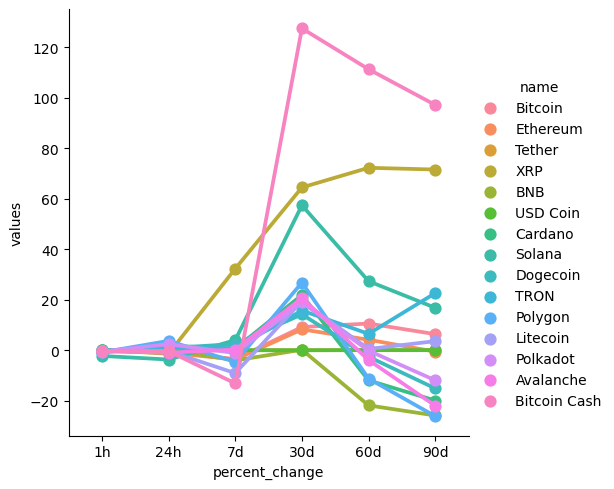

In [53]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [56]:
df8 = df2[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

name  quote.USD.price                   timestamp
0   Bitcoin      29780.91515  2023-07-20 16:24:29.315790
15  Bitcoin      29756.00108  2023-07-20 16:25:32.009358
30  Bitcoin      29733.67950  2023-07-20 16:39:35.882947
45  Bitcoin      29733.56013  2023-07-20 16:40:37.045324

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

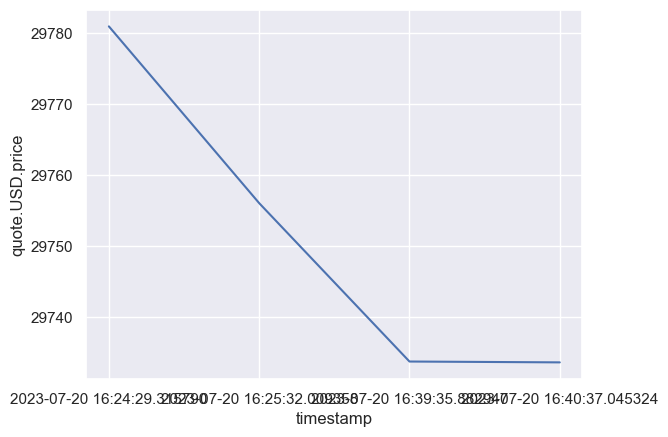

In [57]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)